In [41]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
zip_file_path = '/content/datasets.zip'
unzip_dir = '/content/datasets/datasets'

In [44]:
os.makedirs(unzip_dir, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [45]:
classes = os.listdir(unzip_dir)
print(f"Classes found: {classes}")

Classes found: ['samosa', 'chowmein', 'datasets', 'momo', 'spring_roll', 'pakora']


In [46]:
def count_images(directory):
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_count += 1
    return image_count

total_images = count_images(unzip_dir)
print(f'Total images in the unzipped dataset: {total_images}')

Total images in the unzipped dataset: 938


In [47]:
selected_class = classes[0]
class_dir = os.path.join(unzip_dir, selected_class)
class_dir

'/content/datasets/datasets/samosa'

In [48]:
image_files = os.listdir(class_dir)
print(f"Images found in '{selected_class}' class: {image_files[:5]}")

Images found in 'samosa' class: ['000003.jpg', '000072.jpg', '000066.jpg', '000056.jpg', '000015.jpg']


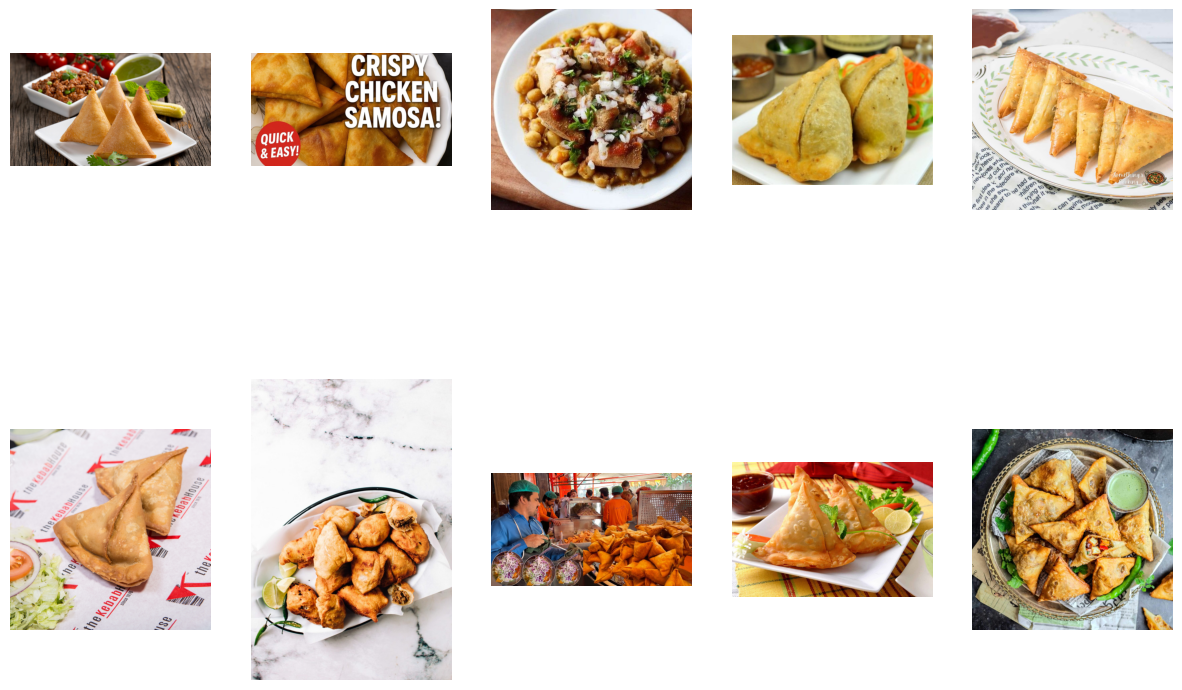

In [49]:
num_images_to_display = 10
images_per_row = 5

fig, axes = plt.subplots(2, images_per_row, figsize=(15, 10))
axes = axes.ravel()

for i in range(num_images_to_display):
    img_path = os.path.join(class_dir, image_files[i])
    img = Image.open(img_path)

    # Display the image
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()

In [50]:
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2, 1.0],
    fill_mode='nearest',
    validation_split=0.2  # Split the data into 80% train and 20% validation
)



In [51]:
train_generator = train_datagen.flow_from_directory(
    unzip_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'  # For training set
)

Found 753 images belonging to 6 classes.


In [52]:
validation_generator = train_datagen.flow_from_directory(
    unzip_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # For validation set
)

Found 185 images belonging to 6 classes.


In [57]:
for _ in range(2):
    x_batch, y_batch = next(train_generator)
    print(f'Batch shape: {x_batch.shape}, Labels shape: {y_batch.shape}')

Batch shape: (32, 224, 224, 3), Labels shape: (32, 6)
Batch shape: (32, 224, 224, 3), Labels shape: (32, 6)


In [62]:
x_batch, y_batch = next(train_generator)

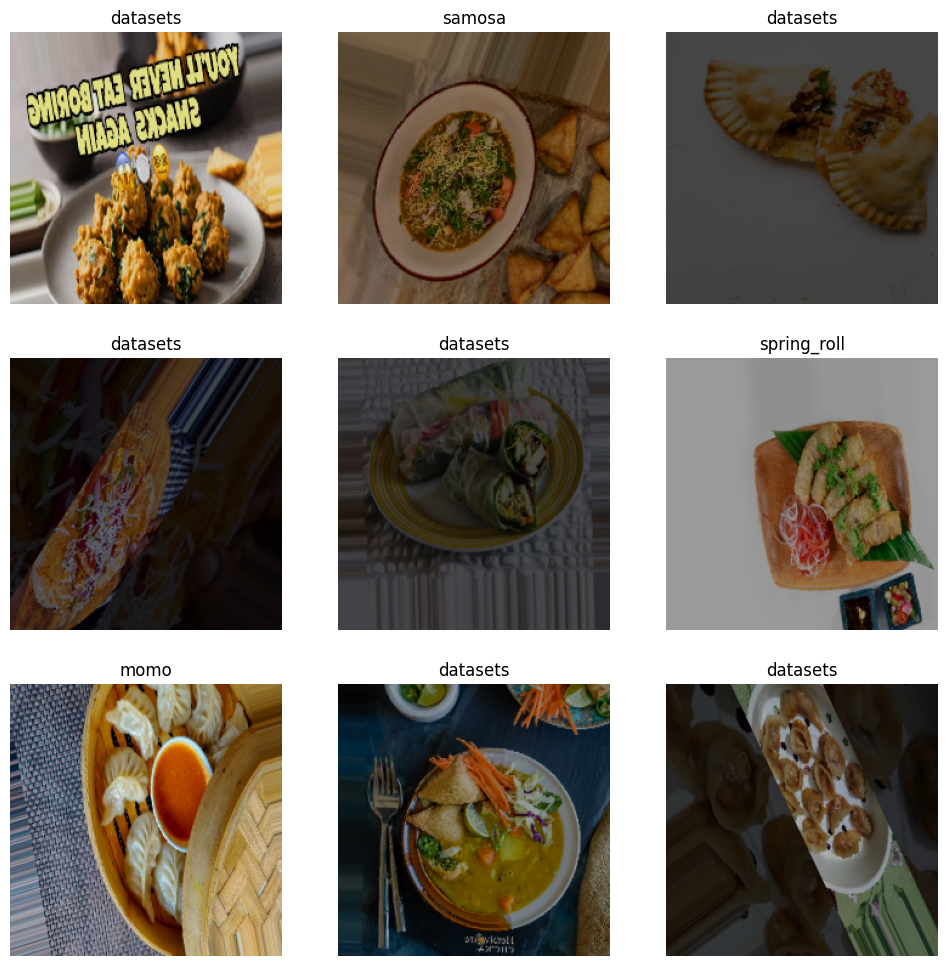

In [63]:
plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

    class_idx = y_batch[i].argmax()
    class_name = list(train_generator.class_indices.keys())[class_idx]
    plt.title(class_name)

plt.show()

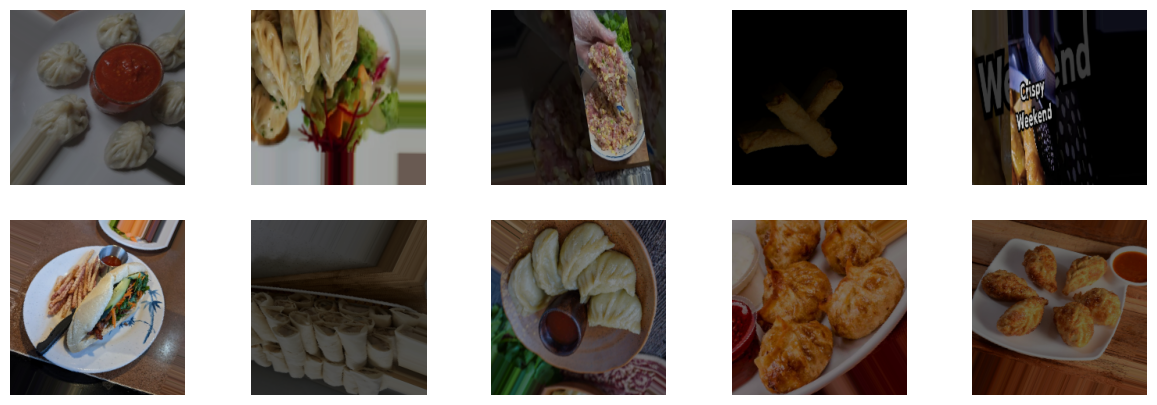

In [61]:
num_images_to_display = 10
images_per_row = 5

fig, axes = plt.subplots(2, images_per_row, figsize=(15, 5))
axes = axes.ravel()

for i in range(num_images_to_display):
    axes[i].imshow(x_batch[i])
    axes[i].axis('off')

plt.show()


In [55]:
num_images = train_generator.samples
print(f'Total images in dataset: {num_images}')

Total images in dataset: 753


In [56]:
class_counts = train_generator.class_indices
print(f'Number of classes: {len(class_counts)}')

for class_name, class_index in class_counts.items():
    print(f'Class: {class_name}, Index: {class_index}')

Number of classes: 6
Class: chowmein, Index: 0
Class: datasets, Index: 1
Class: momo, Index: 2
Class: pakora, Index: 3
Class: samosa, Index: 4
Class: spring_roll, Index: 5
